<a href="https://colab.research.google.com/github/Kshitij879/AQI/blob/main/Copy_of_AQI(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [119]:
import numpy as np 
import pandas as pd 

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data = pd.read_csv('/content/gdrive/My Drive/dataset.csv')
df = data.copy()

df

#df.isnull().sum()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [122]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [123]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)

df['agency'].value_counts()
# date format - mm/dd/yyyy
df['type'].value_counts()

#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

df.isnull().sum()

#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

#dataset after deleting the above columns


In [124]:
df.isnull().sum()

state            0
location         0
type             0
so2              0
no2           1981
rspm         29643
spm         228178
pm2_5       386966
date             4
dtype: int64

In [125]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [126]:
#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()


Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

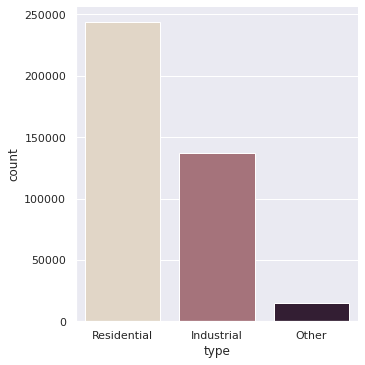

In [127]:
#how many observations belong to each location
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

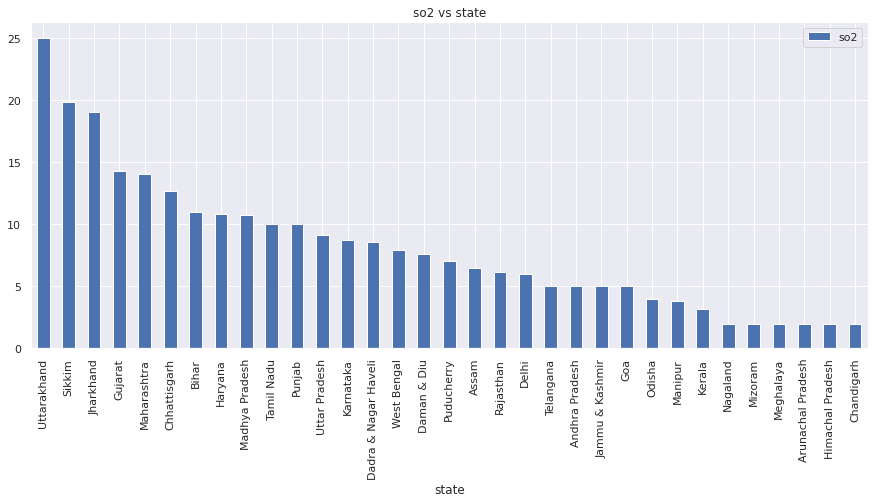

In [128]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar(figsize = (15,6) , title = "so2 vs state")

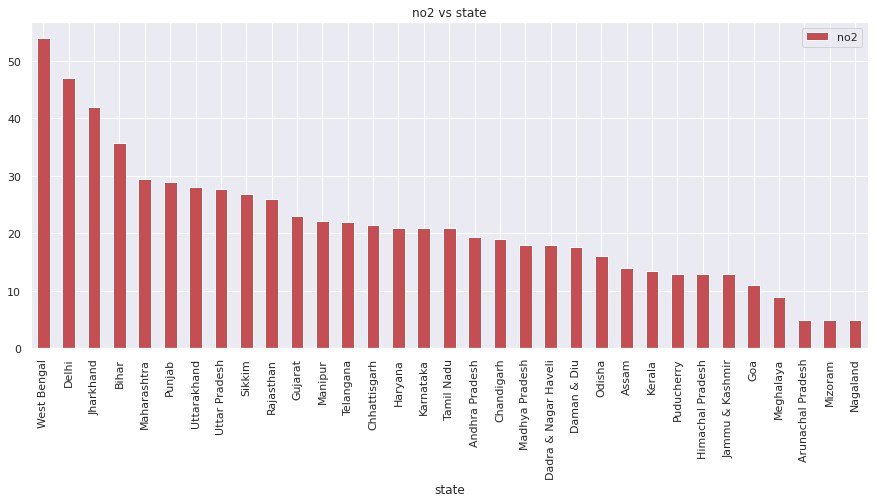

In [129]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r',figsize = (15,6) , title = "no2 vs state")


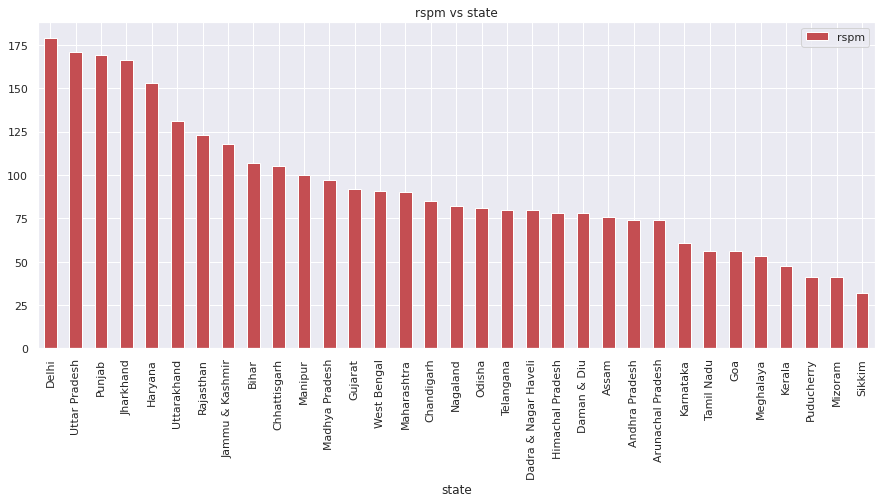

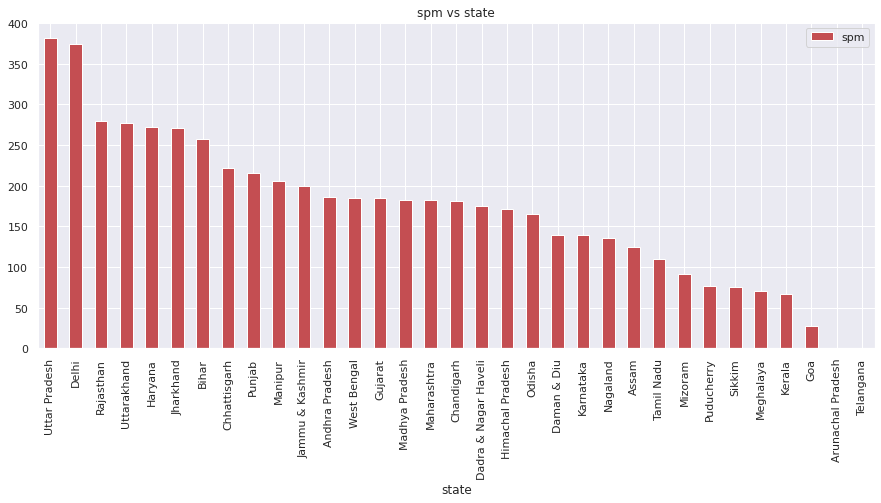

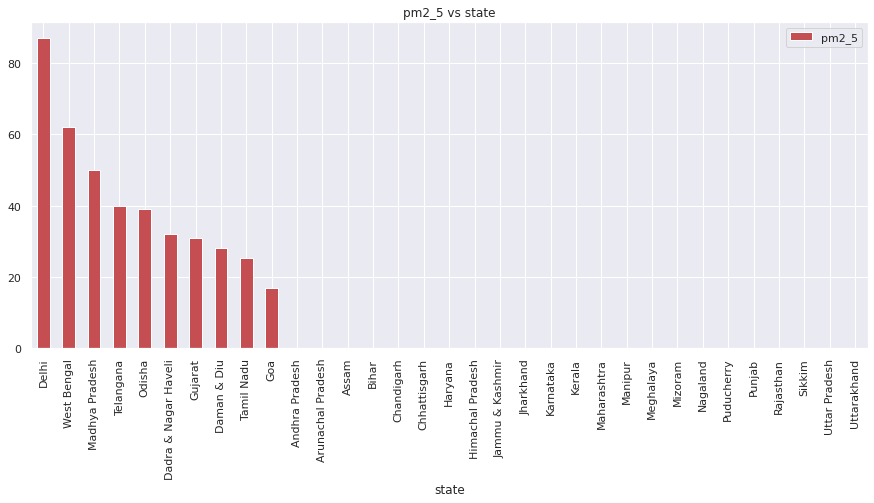

In [130]:
# rspm = PM10
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r' ,figsize = (15,6) , title = "rspm vs state")


# spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r' ,figsize = (15,6) , title = "spm vs state")

# pm2_5
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r' ,figsize = (15,6) , title = "pm2_5 vs state")



Text(0.5, 1.0, 'Correlation matrix')

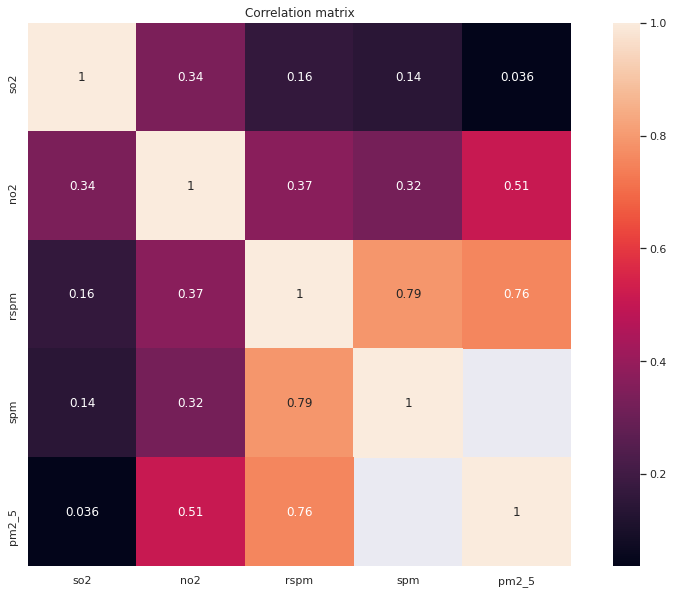

In [132]:
#Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)
plt.title("Correlation matrix")


In [133]:
# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

df.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


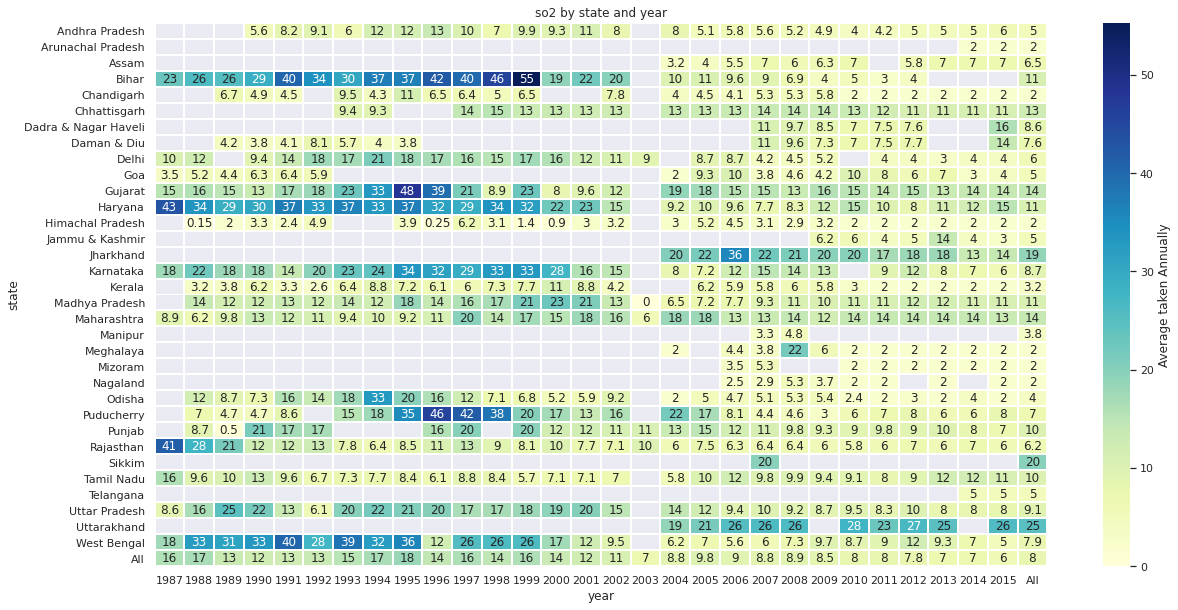

In [134]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (20,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

    
    

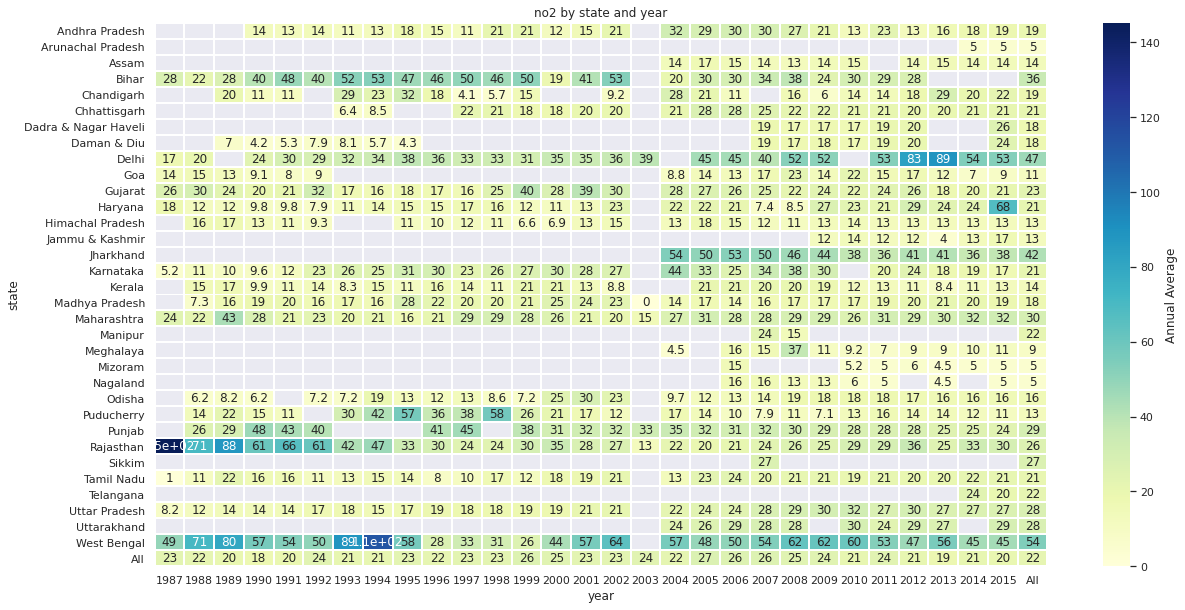

In [135]:
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(20,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})


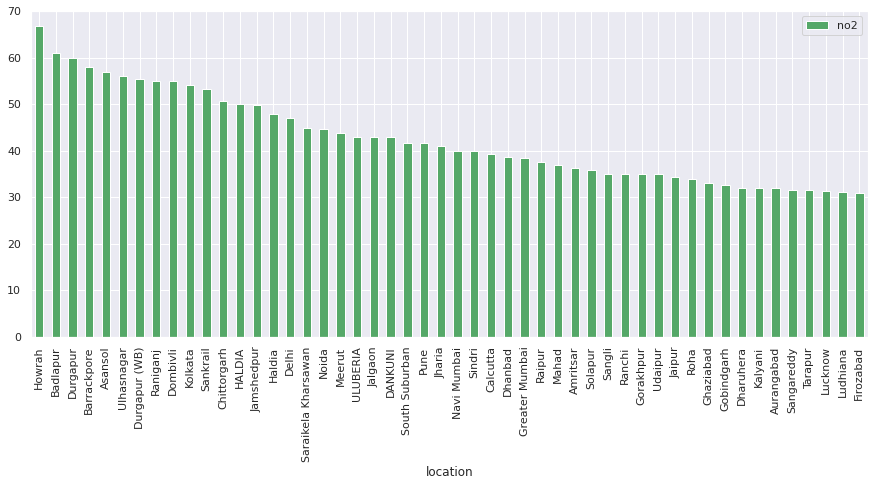

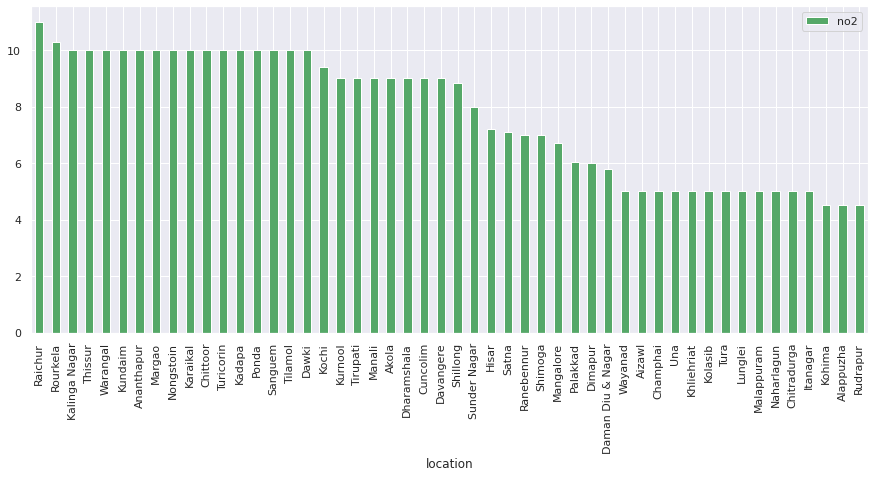

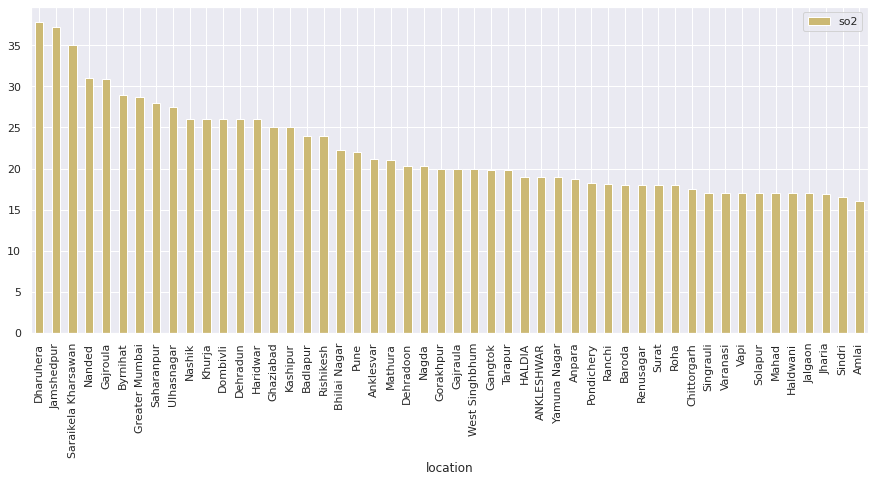

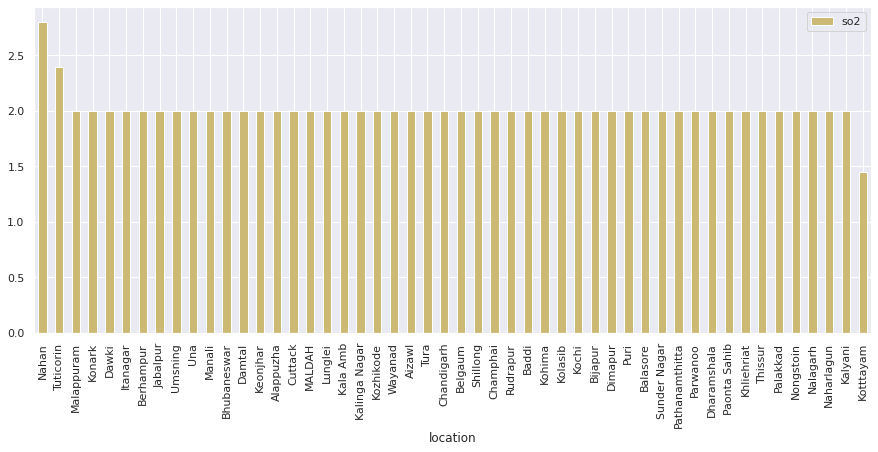

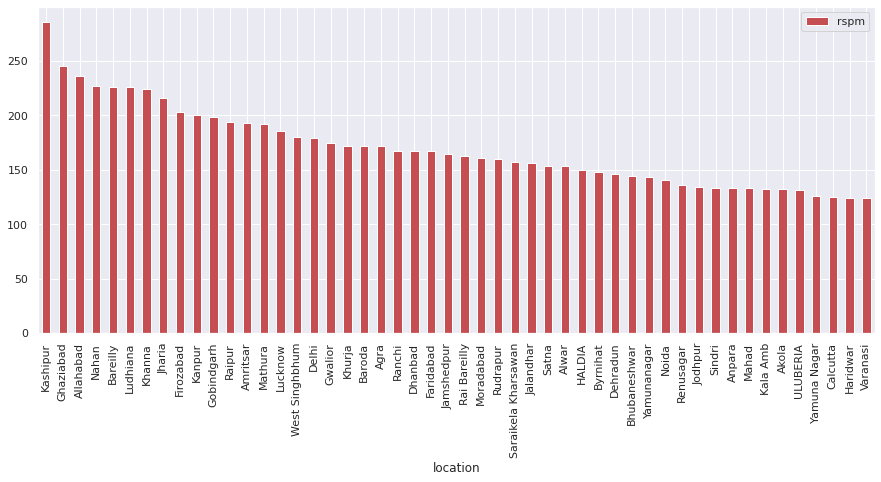

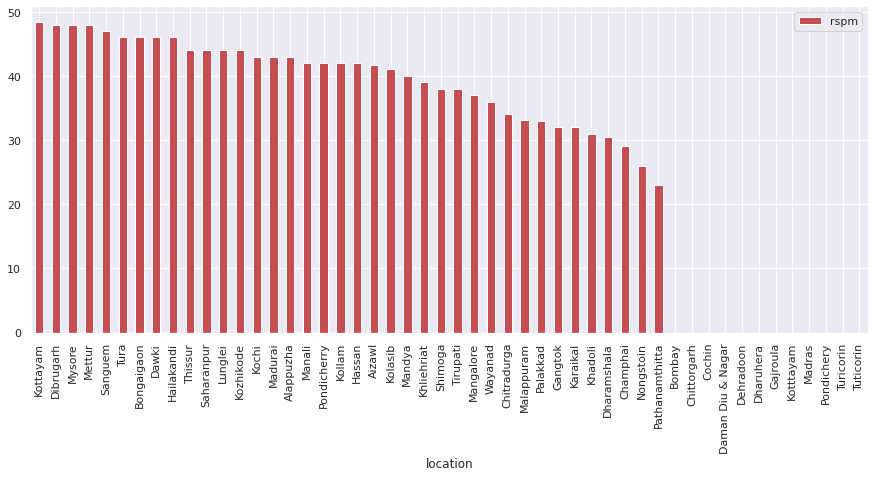

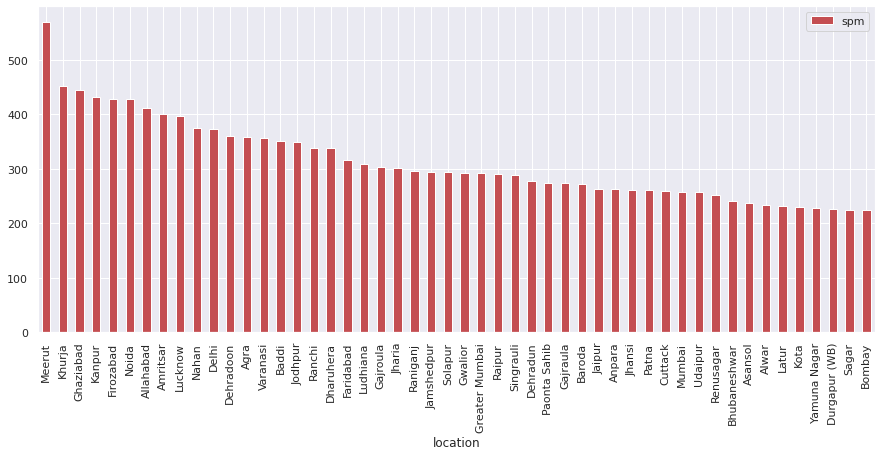

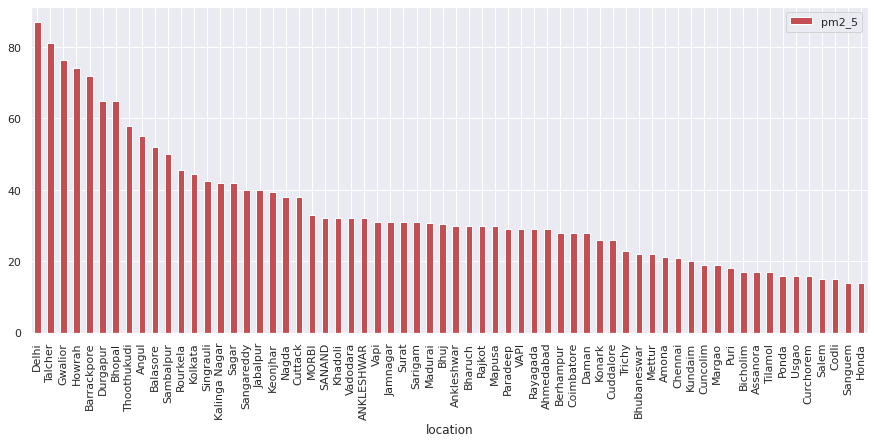

In [136]:
# bar plot of no2 vs location - desc order - first 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g', title = "", figsize = (15,6))

# bar plot of no2 vs location - desc order - last 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g' , title = "", figsize = (15,6))

# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y' , title = "", figsize = (15,6))

# bar plot of no2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y' , title = "", figsize = (15,6))

# rspm = PM10 - location wise - first 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r' , title = "", figsize = (15,6))

# rspm = PM10 - location wise - last 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'r' , title = "", figsize = (15,6))

# spm = PM10 - location wise - first 50
df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'r' , title = "", figsize = (15,6))

# pm2_5 vs location - all non null values
df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r' , title = "", figsize = (15,6))



NULL VALUES COUNT

In [138]:
data.isna().sum() #print the sum of null values for each columns

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

<h2>
DROP UNNECESSARY COLUMN</h2>

In [139]:
data.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)

In [140]:
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990
5,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,3/1/1990
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,4/1/1990
7,Andhra Pradesh,Hyderabad,Industrial Area,4.7,8.7,NaN,NaN,NaN,4/1/1990
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,4/1/1990
9,Andhra Pradesh,Hyderabad,Industrial Area,4.0,8.9,NaN,NaN,NaN,5/1/1990


<h2>CALCULATE TOTAL MISSING VALUES AND THEIR PERCENTAGE</h2>

In [141]:
total = data.isnull().sum().sort_values(ascending=False)

In [142]:
total.head(10)

pm2_5       426428
spm         237387
rspm         40222
so2          34646
no2          16233
type          5393
date             7
location         3
state            0
dtype: int64

Calculate the percent of null values for each columns (sum of null values / total non-null value) *100

In [143]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)

In [144]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [145]:
missing_data.head()

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
rspm,40222,9.230692
so2,34646,7.951035
no2,16233,3.725370


<h2>PERCENT OF MISSING VALUE (BAR PLOT)</h2>

Text(0.5, 1.0, 'Percent missing data by feature')

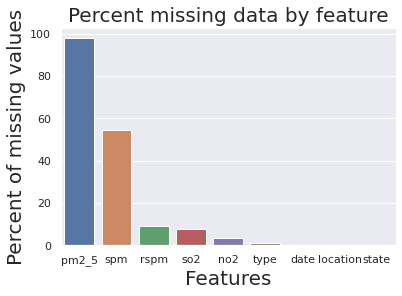

In [146]:
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

<h2>MEAN DISTRIBUTION BY STATE</h2>

In [147]:
data.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()

,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,NaN,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


<h2>FILL MISSING VALUES BY MEAN (GROUP BY STATE)</h2>

In [148]:
grp_state = data.groupby('state')

In [149]:
def impute_mean_by_state(series):
    return series.fillna(series.mean())

In [150]:
data['rspm']=grp_state['rspm'].transform(impute_mean_by_state)  #fill value with mean value group by state
data['so2']=grp_state['so2'].transform(impute_mean_by_state)
data['no2']=grp_state['no2'].transform(impute_mean_by_state)
data['spm']=grp_state['spm'].transform(impute_mean_by_state)
data['pm2_5']=grp_state['pm2_5'].transform(impute_mean_by_state)

In [151]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,435739.000000,435739.000000,435739.000000,431671.000000,123689.000000
mean,10.589141,25.663170,109.680907,215.198748,48.317274
std,10.863679,18.271145,72.519399,117.470157,21.455206
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,4.800000,14.000000,59.000000,142.000000,30.729696
50%,8.000000,21.800000,93.000000,205.255823,42.204089
75%,13.000000,32.000000,142.016832,248.000000,64.890625
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [152]:
data.isna().sum() #some null value remains since some state have one value(i.e NaN only) and no mean to replace them

state            0
location         3
type          5393
so2              3
no2              3
rspm             3
spm           4071
pm2_5       312053
date             7
dtype: int64

<h2>CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA</h2>
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used$$\begin{equation*}
I = I_{low} +  \frac{I_{high}-I_{low}}{C_{high}-C_{low}}{(C-C_{low})}
\end{equation*}$$


In [153]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [154]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


<h2>CALCULATE AIR QUALITY INDEX FOR NO2 BASED ON FORMULA</h2>

In [155]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


<h2>CALCULATE AIR QUALITY INDEX FOR RSPM BASED ON FORMULA

In [156]:
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)
df= data[['rspm','RSPMi']]
df.head()

,rspm,RSPMi
0,78.182824,78.182824
1,78.182824,78.182824
2,78.182824,78.182824
3,78.182824,78.182824
4,78.182824,78.182824


In [157]:
df.tail()

,rspm,RSPMi
435737,143.0,185.857143
435738,171.0,0.000000
435739,NaN,0.000000
435740,NaN,0.000000
435741,NaN,0.000000


<h2>CALCULATE AIR QUALITY INDEX FOR SPM BASED ON FORMULA

In [158]:

def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


<h2>
CALCULATE AIR QUALITY INDEX FOR PM 2.5 BASED ON FORMULA

In [159]:
def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
data['PMi']=data['pm2_5'].apply(cal_pmi)
df= data[['pm2_5','PMi']]
df.tail()

,pm2_5,PMi
435737,64.890625,64.890625
435738,64.890625,64.890625
435739,NaN,NaN
435740,NaN,NaN
435741,NaN,NaN


Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants. The worst sub-index reflects overall AQI.If multiple pollutants are measured at a monitoring site, then the largest or "dominant" AQI value is reported for the location

In [160]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
df= data[['state','SOi','Noi','RSPMi','SPMi','AQI']]
df.head()

,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,78.182824,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,78.182824,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,78.182824,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,78.182824,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,78.182824,166.840252,166.840252


In [161]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,2/1/1990,6.000,21.750,78.182824,166.840252,NaN,166.840252
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,2/1/1990,3.875,8.750,78.182824,166.840252,NaN,166.840252
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,2/1/1990,7.750,35.625,78.182824,166.840252,NaN,166.840252
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,3/1/1990,7.875,18.375,78.182824,166.840252,NaN,166.840252
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,3/1/1990,5.875,9.375,78.182824,166.840252,NaN,166.840252


<h1>AQI RANGE for corresponding AQI value


In [162]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,2/1/1990,6.000,21.750,78.182824,166.840252,NaN,166.840252,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,2/1/1990,3.875,8.750,78.182824,166.840252,NaN,166.840252,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,2/1/1990,7.750,35.625,78.182824,166.840252,NaN,166.840252,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,3/1/1990,7.875,18.375,78.182824,166.840252,NaN,166.840252,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,3/1/1990,5.875,9.375,78.182824,166.840252,NaN,166.840252,Poor


In [163]:
d=data #saving data in new value
d.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,2/1/1990,6.000,21.750,78.182824,166.840252,NaN,166.840252,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,2/1/1990,3.875,8.750,78.182824,166.840252,NaN,166.840252,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,2/1/1990,7.750,35.625,78.182824,166.840252,NaN,166.840252,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,3/1/1990,7.875,18.375,78.182824,166.840252,NaN,166.840252,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,3/1/1990,5.875,9.375,78.182824,166.840252,NaN,166.840252,Poor


<h1>
Remove the rows with null values

In [164]:
data=data.dropna(subset=['spm']) #spm

In [165]:
data=data.dropna(subset=['pm2_5']) #spm

In [166]:

data.isna().sum() #all null values removed

state           0
location        0
type         1925
so2             0
no2             0
rspm            0
spm             0
pm2_5           0
date            1
SOi             0
Noi             0
RSPMi           0
SPMi            0
PMi             0
AQI             0
AQI_Range       0
dtype: int64

<h1>Linear Regression prediction

1.
Using SOi, NOi, RSPMi, SPMi TO PREDICT AQI

In [167]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [168]:

X = data[['SOi','Noi','RSPMi','SPMi']]
y = data['AQI']
y.head()

64445    76.53653
64446    76.53653
64447    76.53653
64448    76.53653
64449    76.53653
Name: AQI, dtype: float64

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [170]:
X_train.head()

,SOi,Noi,RSPMi,SPMi
360028,3.750,40.000,51.000000,117.819376
434684,2.500,46.250,87.000000,189.004349
64493,13.250,23.375,115.142857,210.000000
433906,5.000,55.000,115.142857,189.004349
183595,34.375,26.000,91.000000,106.000000


In [171]:
LR = LinearRegression() 
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
print('Coefficients',LR.coef_)

Coefficients [0.02669704 0.06811693 0.05053633 0.9544088 ]


In [173]:
predictions = LR.predict(X_test)

Text(0, 0.5, 'Predicted Y')

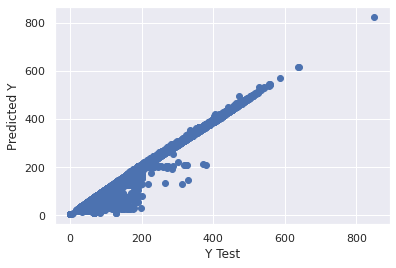

In [174]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [175]:
LR.score(X_test,y_test)

0.9791014082309275

In [176]:
LR.predict([[4.8,21.75,78.18,100]])

array([105.17034145])

In [177]:
LR.predict([[5.2,7.625,76.53,75.0]])

array([80.27526359])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


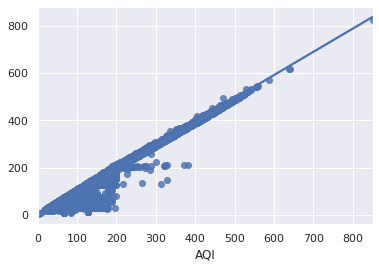

In [178]:
sns.regplot(y_test,predictions)

In [179]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))


R^2_Square:0.98 
MSE:12.58 


<h2>Linear Regression Model 2

Using so2, no2, rspm, spm



In [180]:
X1= data[['so2','no2','rspm','spm']]
y1 = data['AQI']
y.tail()

435734    195.959184
435735    189.004349
435736    189.004349
435737    189.004349
435738    189.004349
Name: AQI, dtype: float64

In [181]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2,random_state=101)

In [182]:
X_train1.head()

,so2,no2,rspm,spm
360028,3.0,32.0,51.0,126.729064
434684,2.0,37.0,87.0,233.506524
64493,10.6,18.7,108.0,260.000000
433906,4.0,44.0,108.0,233.506524
183595,27.5,20.8,91.0,109.000000


In [183]:
LR1 = LinearRegression()
LR1.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
prediction1 = LR1.predict(X_test1)

Text(0, 0.5, 'Predicted Y')

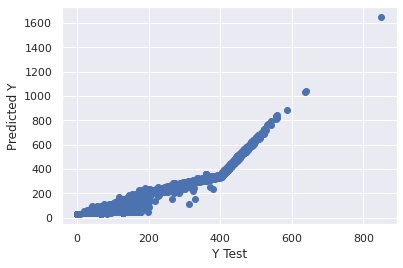

In [185]:
plt.scatter(y_test1,prediction1) #scatter plot for actual and predicted values
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [186]:
LR1.predict([[9.1,16.3,67,179]])

array([154.79655317])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


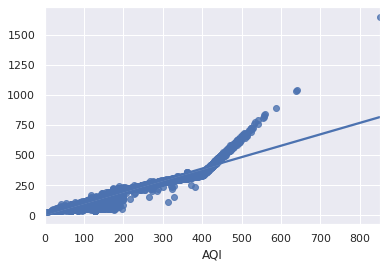

In [187]:
sns.regplot(y_test1,prediction1) #regression plot

In [188]:
y_test1_np= np.array(y_test1)
prediction1_np = np.array(prediction1)

In [189]:
LR1.score(X_test1,y_test1) #accuracy score 76.82%

0.9433954748037254

In [190]:
print('R^2_Square:%.2f '% r2_score(y_test1, prediction1))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test1, prediction1)))

R^2_Square:0.94 
MSE:20.71 


<h1>Classification of AQI

<h2>Logistic regression model 2

1.Using SOi, Noi, RSPMi, SPMi

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
X2 = data[['SOi','Noi','RSPMi','SPMi']]
y2 = data['AQI_Range']

In [193]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [194]:
logmodel = LogisticRegression()
logmodel.fit(X_train2,y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
predictions = logmodel.predict(X_test)

In [196]:
logmodel.score(X_test2,y_test2) #accuracy score 89.25 %

0.7013289457030756

Creating new csv file to store AQI range values inorder to cross verify predicted value

In [197]:
new = pd.DataFrame(d)
file1 = 'new1.csv'
new.to_csv(file1,index=True)

In [198]:
d.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,233.506524,64.890625,12/24/2015,27.5,62.5,185.857143,189.004349,64.890625,189.004349,Poor
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,233.506524,64.890625,12/29/2015,25.0,57.5,0.000000,189.004349,64.890625,189.004349,Poor
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good


In [199]:
logmodel.predict([[77.4,147.7,78.182,100]]) #correct

array(['Moderate'], dtype=object)

In [200]:
logmodel.predict([[32.7,35,78.182,203]]) #correct

array(['Poor'], dtype=object)

In [201]:
logmodel.predict([[100,182.2,78.182,400]]) #correct

array(['Poor'], dtype=object)

2.Using so2,no2,rspm,spm

In [202]:
X3 = data[['so2','no2','rspm','spm']]
y3 = data['AQI_Range']

In [203]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)

In [204]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train3,y_train3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
logmodel2.score(X_test3,y_test3) #very low accuracy score

0.6801670674598153

In [206]:
logmodel2.predict([[4.8,17.4,78.48,200]]) #correct

array(['Poor'], dtype=object)

In [207]:
logmodel2.predict([[67.4,127.7,78.48,215]]) #correct

array(['Poor'], dtype=object)

In [208]:
logmodel2.predict([[2.059,8.94,102,256]])  #wrong

array(['Hazardous'], dtype=object)

<h2>Using Random forest classifier

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train3,y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [211]:
model.score(X_test3,y_test3) #high accuracy score of 99.97 %

0.9997721807366157

In [212]:
model.predict([[2.059,8.94,102,256]]) #correct

array(['Unhealthy'], dtype=object)

<h2>Using Decision Tree Classifier

In [213]:
from sklearn import tree

In [214]:
model2 = tree.DecisionTreeClassifier()

In [215]:
model2.fit(X_train3,y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [216]:
model2.score(X_test3,y_test3) #high accuracy score of 99.98%

0.9997721807366157

In [217]:
model2.predict([[9,31,51,205.25]]) # correct

array(['Poor'], dtype=object)

In [218]:
model2.predict([[2,5.8,17,36]]) # correct

array(['Good'], dtype=object)

<h2>Conclusion</h2>
AQI is highly correlated with all the independent variables(so2, no2, rspm, spm)
AQI has been increasing over the years.
<h2>Best models for AQI range classification :</h2>
1.Random Forest Classifier
2.Decision Tree Classifier